# 1. Linear Regression 
### 공부 시간에 따른 시험 점수 

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

dataset = pd.read_csv('LinearRegressionData.csv')


In [2]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [4]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 칼럼 직전까지 데이터 (독립변수)
y = dataset.iloc[:, -1].values

In [5]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # 학습 (모델 생성)

LinearRegression()

In [7]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

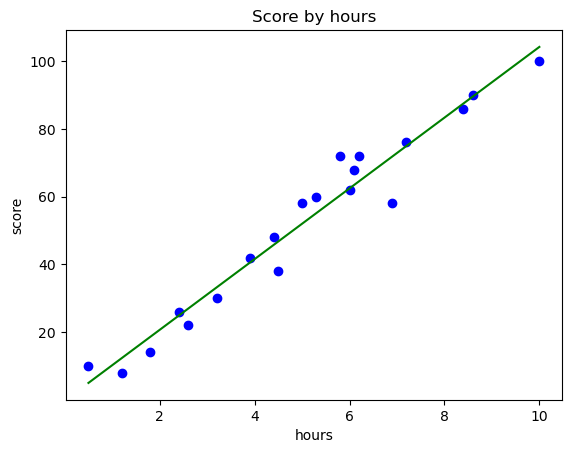

In [10]:
plt.scatter(X, y, color='blue') #산점도
plt.plot(X, y_pred, color='green') #선그래프
plt.title("Score by hours") #제목
plt.xlabel("hours") # X축 이름 
plt.ylabel('score')
plt.show()

In [15]:
print("9시간 공부했을때 점수",reg.predict([[9]])) # [9], [8], [7]

9시간 공부했을때 점수 [93.77478776]


In [16]:
reg.coef_ # 기울기 (m)

array([10.44369694])

In [12]:
reg.intercept_ # y절편(b)

-0.21848470286721522

In [16]:
yy = 10.4436*9 - 0.2184
print(yy)

93.774


### 데이터 셋트 분리

In [18]:
import matplotlib.pyplot as plt 
import pandas as pd

dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [23]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #훈련셋 80 : 테스트 셋 :20

In [26]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [27]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [29]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [30]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [31]:
y_test,  len(y_test)

(array([ 90,   8, 100,  38]), 4)

### 분리된 데이터를 통한 모델링

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [33]:
reg.fit(X_train, y_train)  # 훈련셋으로 학습

LinearRegression()

### 훈련셋으로 데이터 시각화 

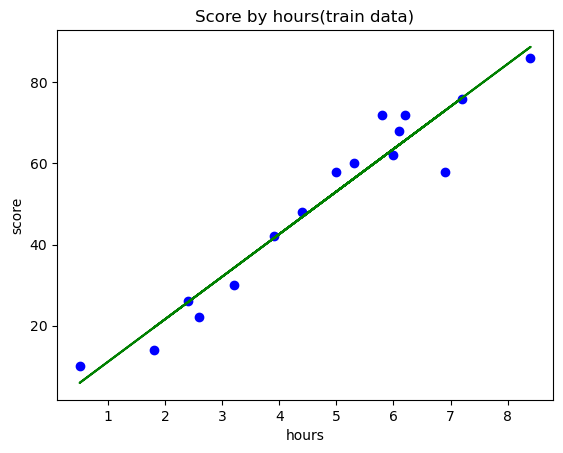

In [35]:
plt.scatter(X_train, y_train, color='blue') #산점도
plt.plot(X_train, reg.predict(X_train), color='green') #선그래프
plt.title("Score by hours(train data)") #제목
plt.xlabel("hours") # X축 이름 
plt.ylabel('score')
plt.show()

### 데이터 시각화(테스트 셋)

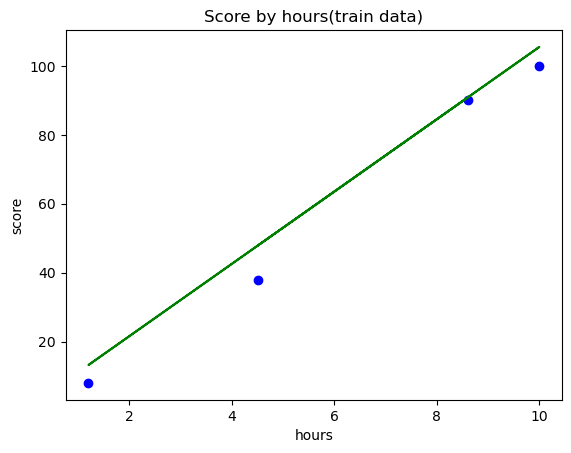

In [36]:
plt.scatter(X_test, y_test, color='blue') #산점도
plt.plot(X_test, reg.predict(X_test), color='green') #선그래프
plt.title("Score by hours(train data)") #제목
plt.xlabel("hours") # X축 이름 
plt.ylabel('score')
plt.show()

In [37]:
reg.coef_

array([10.49161294])

In [38]:
reg.intercept_

0.6115562905169796

### 모델 평가 

In [39]:
reg.score(X_test, y_test)

0.9727616474310156

In [40]:
reg.score(X_train, y_train)

0.9356663661221668